In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
import IPython.display as ipd
import librosa
import librosa.display
import os

In [3]:
filename = 'dog_bark.wav'

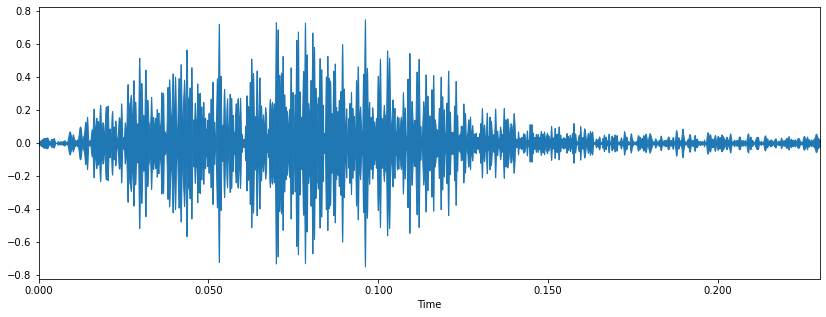

In [4]:
## Example dog sound
plt.figure(figsize=(14, 5))
data, sample_rate = librosa.load(filename)
librosa.display.waveplot(data, sr = sample_rate)
ipd.Audio(filename)

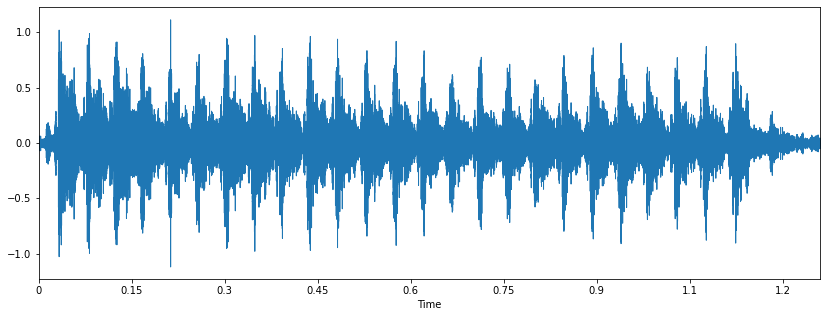

In [5]:
## Example sound
filename = '14772-7-0-0.wav'
plt.figure(figsize=(14, 5))
data, sample_rate = librosa.load(filename)
librosa.display.waveplot(data, sr = sample_rate)
ipd.Audio(filename)

In [6]:
sample_rate

22050

In [7]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filename)

In [8]:
wave_sample_rate

44100

In [9]:
wave_audio

array([-852, -750, -634, ...,  399,   12,  151], dtype=int16)

In [10]:
data

array([-0.01891879, -0.0217675 , -0.02612744, ...,  0.01075222,
        0.01886175,  0.0033747 ], dtype=float32)

In [11]:
import pandas as pd

metadata = pd.read_csv('UrbanSound8K.csv')

In [12]:
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [13]:
# check whether the dataset is imbalance.
metadata['class'].value_counts()

drilling            1000
air_conditioner     1000
engine_idling       1000
dog_bark            1000
jackhammer          1000
children_playing    1000
street_music        1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

## Audio classification and data preprocessing

In [20]:
# lets read a smaple audio using librosa
import librosa
audio_file_path = '14358-3-0-85.wav'
librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)

In [21]:
print(librosa_audio_data)

[ 0.05407592  0.01314117 -0.04419294 ...  0.10773971 -0.01540541
 -0.13411863]


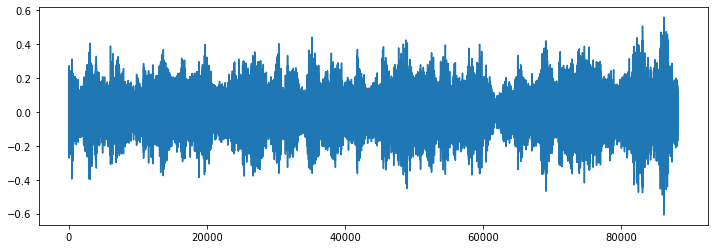

In [22]:
# lets plot the librosa audio data
# Orignal audio with 1 channel
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

## Observation
Here librosa converts the signal to mono, meaning the channel will always be 1

In [23]:
# Lets read with scipy
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [24]:
wave_audio

array([[ 3330,  2015],
       [ 2893,    75],
       [ 1175,  -997],
       ...,
       [-3542, -1653],
       [-5741, -2430],
       [-6485, -3341]], dtype=int16)

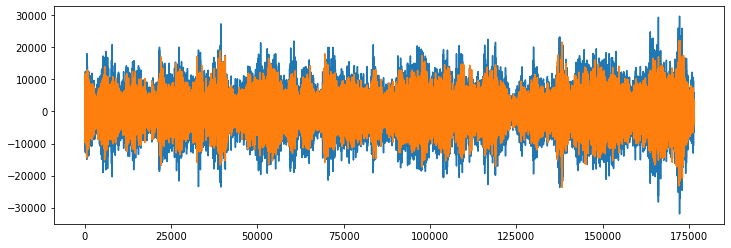

In [25]:
# Orignal audio with 2 channels
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

### Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC)  from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [26]:
mfccs = librosa.feature.mfcc(y = librosa_audio_data, sr = librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [27]:
mfccs

array([[-139.36499   , -146.85808   , -161.71715   , ..., -151.24687   ,
        -159.63266   , -159.05164   ],
       [ -35.065514  ,  -35.260895  ,  -31.429142  , ...,  -53.800156  ,
         -51.452755  ,  -53.73702   ],
       [ -33.65736   ,  -38.383945  ,  -34.137043  , ...,  -28.033169  ,
         -25.0017    ,  -15.992794  ],
       ...,
       [   4.326389  ,    4.5778847 ,   -0.44270074, ...,    2.9737852 ,
           5.077299  ,   -2.923974  ],
       [  -2.6268907 ,   -3.3490882 ,   -1.169839  , ...,   -4.234825  ,
          -3.0150857 ,   -6.655627  ],
       [   5.356488  ,    6.1456585 ,    2.8935697 , ...,   -3.961485  ,
          -2.5887952 ,   -1.5578625 ]], dtype=float32)

In [28]:
# Extraction MFCC's for every audio file

audio_dataset_path = 'urbanSounds/'
metadata = pd.read_csv('UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [29]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y = audio, sr = sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis = 0)
    
    return mfccs_scaled_features

In [34]:
import numpy as np
from tqdm import tqdm
## Now we iterate through every audio file and extract features
## using Mel-Frequency Cepstral Coefficients
extracted_features = []
for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), 'fold'+ str(row['fold'])+'/', str(row['slice_file_name']))
    final_class_labels = row['class']
    data = features_extractor(file_name)
    extracted_features.append([data, final_class_labels])

3555it [05:12, 11.14it/s]C:\Users\Aman kumar\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8325it [12:24, 12.28it/s]C:\Users\Aman kumar\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
C:\Users\Aman kumar\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [12:58, 11.21it/s]


In [35]:
## converting extracted_features to Pandas dataframe
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature', 'class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091335,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265697,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.60859, 1.6...",children_playing


In [36]:
## Split the dataset into independent and dependent dataset
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [37]:
X.shape

(8732, 40)

In [38]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [39]:
y = np.array(pd.get_dummies(y))

In [40]:
y.shape

(8732, 10)

In [41]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [46]:
X_train

array([[-1.3183614e+02,  1.1397464e+02, -2.3956861e+01, ...,
         3.3314774e+00, -1.4786109e+00,  2.8736601e+00],
       [-1.4074220e+01,  9.1916939e+01, -8.6787214e+00, ...,
        -3.3844023e+00, -5.2119045e+00, -1.5936136e+00],
       [-4.9532028e+01,  1.5521857e-01, -2.0369110e+01, ...,
         2.0491767e+00, -8.0537486e-01,  2.7793026e+00],
       ...,
       [-4.2699332e+02,  9.2890656e+01,  3.0233388e+00, ...,
         8.6335975e-01,  6.4766806e-01,  7.8490508e-01],
       [-1.4607024e+02,  1.3709459e+02, -3.4298344e+01, ...,
         1.3777871e+00, -1.9530845e+00, -8.9652127e-01],
       [-4.2167450e+02,  2.1169032e+02,  2.6820304e+00, ...,
        -5.1484952e+00, -3.6400862e+00, -1.3321606e+00]], dtype=float32)

In [47]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [42]:
X_train.shape

(6985, 40)

In [43]:
X_test.shape

(1747, 40)

In [44]:
y_train.shape

(6985, 10)

In [45]:
y_test.shape

(1747, 10)

### Model Creation

In [49]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [51]:
## No of classes
num_labels = y.shape[1]

In [53]:
model = Sequential()

## first layer
model.add(Dense(100, input_shape = (40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

## second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

## third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

## final Layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [55]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer = 'adam')

In [59]:
## Training my model

from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                              verbose=1, save_best_only=True)

start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start

print("Training completed in time: ", duration)

Epoch 1/100
219/219 [==============================] - 0s 2ms/step - loss: 0.9220 - accuracy: 0.6989 - val_loss: 0.7357 - val_accuracy: 0.7750

Epoch 00001: val_loss improved from inf to 0.73571, saving model to saved_models\audio_classification.hdf5
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.8934 - accuracy: 0.7047 - val_loss: 0.7338 - val_accuracy: 0.7768

Epoch 00002: val_loss improved from 0.73571 to 0.73384, saving model to saved_models\audio_classification.hdf5
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.8932 - accuracy: 0.7078 - val_loss: 0.7467 - val_accuracy: 0.7750

Epoch 00003: val_loss did not improve from 0.73384
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.9157 - accuracy: 0.7029 - val_loss: 0.7358 - val_accuracy: 0.7739

Epoch 00004: val_loss did not improve from 0.73384
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.8957 - accuracy: 0.7031 - v

219/219 [==============================] - 0s 2ms/step - loss: 0.8612 - accuracy: 0.7168 - val_loss: 0.7175 - val_accuracy: 0.7853

Epoch 00041: val_loss did not improve from 0.70531
Epoch 42/100
219/219 [==============================] - 0s 2ms/step - loss: 0.8838 - accuracy: 0.7121 - val_loss: 0.7180 - val_accuracy: 0.7779

Epoch 00042: val_loss did not improve from 0.70531
Epoch 43/100
219/219 [==============================] - 0s 2ms/step - loss: 0.9249 - accuracy: 0.7026 - val_loss: 0.7240 - val_accuracy: 0.7825

Epoch 00043: val_loss did not improve from 0.70531
Epoch 44/100
219/219 [==============================] - 0s 2ms/step - loss: 0.8693 - accuracy: 0.7108 - val_loss: 0.7203 - val_accuracy: 0.7842

Epoch 00044: val_loss did not improve from 0.70531
Epoch 45/100
219/219 [==============================] - 0s 2ms/step - loss: 0.8818 - accuracy: 0.7134 - val_loss: 0.7113 - val_accuracy: 0.7836

Epoch 00045: val_loss did not improve from 0.70531
Epoch 46/100
219/219 [===========

219/219 [==============================] - 0s 2ms/step - loss: 0.8800 - accuracy: 0.7151 - val_loss: 0.7217 - val_accuracy: 0.7768

Epoch 00082: val_loss did not improve from 0.68835
Epoch 83/100
219/219 [==============================] - 0s 2ms/step - loss: 0.8624 - accuracy: 0.7171 - val_loss: 0.7142 - val_accuracy: 0.7842

Epoch 00083: val_loss did not improve from 0.68835
Epoch 84/100
219/219 [==============================] - 0s 2ms/step - loss: 0.8511 - accuracy: 0.7246 - val_loss: 0.7036 - val_accuracy: 0.7922

Epoch 00084: val_loss did not improve from 0.68835
Epoch 85/100
219/219 [==============================] - 0s 2ms/step - loss: 0.8757 - accuracy: 0.7165 - val_loss: 0.7327 - val_accuracy: 0.7779

Epoch 00085: val_loss did not improve from 0.68835
Epoch 86/100
219/219 [==============================] - 0s 2ms/step - loss: 0.8688 - accuracy: 0.7218 - val_loss: 0.6943 - val_accuracy: 0.7831

Epoch 00086: val_loss did not improve from 0.68835
Epoch 87/100
219/219 [===========

In [60]:
test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(test_accuracy[1])

0.7813394665718079


In [63]:
filename = 'dog_bark.wav'
prediction_feature = features_extractor(filename)
prediction_feature = prediction_feature.reshape(1, -1)
model.predict_classes(prediction_feature)

C:\Users\Aman kumar\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1], dtype=int64)

In [67]:
prediction_feature.shape


(1, 40)

In [68]:
X_test[1]

array([-466.1843    ,    1.5388278 ,  -34.397358  ,   35.715336  ,
        -15.166929  ,  -18.850813  ,   -0.7415805 ,  -15.99989   ,
        -21.354332  ,    7.6506834 ,  -29.031452  ,  -19.142824  ,
         -2.6798913 ,   -8.466884  ,  -14.7660475 ,   -7.004778  ,
         -7.103754  ,    8.887754  ,   14.911873  ,   21.47102   ,
         21.336624  ,    0.9169518 ,  -18.795404  ,   -5.001721  ,
         -0.70152664,    2.91399   ,   -6.7105994 ,  -16.638536  ,
         -9.821647  ,   12.8619585 ,    0.6552978 ,  -23.953394  ,
        -15.200551  ,    9.21079   ,   10.419799  ,   -0.57916117,
         -1.2440346 ,   17.722294  ,   13.837573  ,   -5.164349  ],
      dtype=float32)

In [69]:
model.predict_classes(X_test)

C:\Users\Aman kumar\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([5, 4, 4, ..., 1, 2, 5], dtype=int64)

### Testing Some test Audio Data



In [ ]:
filename = '14358-3-0-85.wav'
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis = 0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_features.reshape(1, -1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label = model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

In [72]:
prediction_feature.shape

(1, 40)

In [73]:
mfccs_scaled_features.shape

(1, 6920)